In [1]:
import os
os.chdir('..')

In [2]:
from pathlib import Path

import pandas as pd

from eval_qaoa_run import get_appr_ratio_df
from experiment_complete_eval import create_combined_df, boxplot_df, grid_plot_df, get_all_metrics_df, \
    plot_scatter_with_regression2, correlation
import seaborn as sns

from matplotlib import pyplot as plt

In [3]:
path = Path('experiment_complete')
figure_path = Path('figures')
exclude_ids = ['19', '21', '30']
example_id = 20
example_path = Path('experiment_complete/20/ibmq_ehningen_2022-08-24-05-50-51/param_map')
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
markers = ['o', 'v']

figure_path.mkdir(exist_ok=True)

In [4]:
context_boxplots = {'font.size': 10.0,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'legend.fontsize': 20,
                    'legend.title_fontsize': None,
                    'axes.linewidth': 0.8,
                    'grid.linewidth': 0.8,
                    'lines.linewidth': 1.5,
                    'lines.markersize': 6.0,
                    'patch.linewidth': 1.0,
                    'xtick.major.width': 0.8,
                    'ytick.major.width': 0.8,
                    'xtick.minor.width': 0.6,
                    'ytick.minor.width': 0.6,
                    'xtick.major.size': 3.5,
                    'ytick.major.size': 3.5,
                    'xtick.minor.size': 2.0,
                    'ytick.minor.size': 2.0}

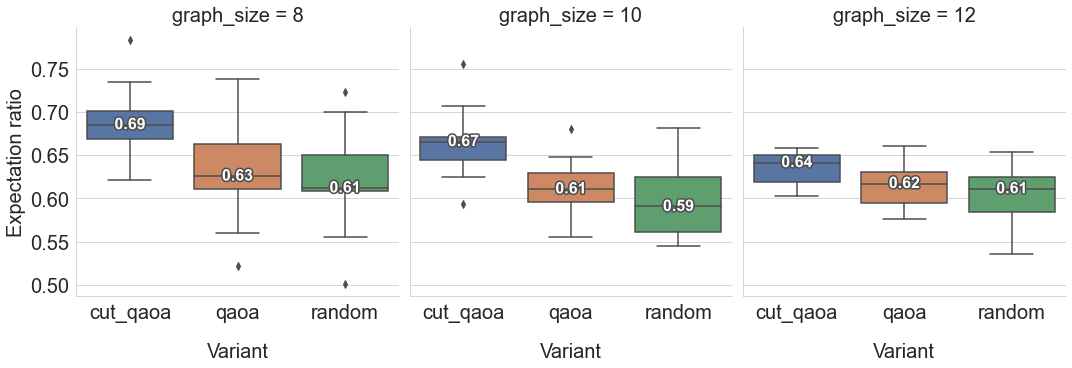

In [5]:
exp_df = create_combined_df(path, min_exp=13, max_exp=None, config=None,
                            csv_files_to_collect={'': 'qaoa_execution/expectation.csv'}, add_config=True)
exp_df_f = exp_df[exp_df['value_type'] != 'expectation'].copy()
exp_df_f = exp_df_f[exp_df_f['graph_size'] != 14].copy()
exp_df_f = exp_df_f[exp_df_f['algorithm'] != 'qaoa'].copy()
exp_df_f = exp_df_f[~exp_df_f['exp_id'].isin(exclude_ids)]
exp_df_f['algorithm'] = exp_df_f['algorithm'].apply(lambda name: name.replace('qaoa_short', 'qaoa'))
bp_exp = boxplot_df(exp_df_f, x='algorithm', y='value', col='graph_size', order=['cut_qaoa', 'qaoa', 'random'],
                    ylabel='Expectation ratio', xlabel='Variant', median_fontsize=16, context=context_boxplots)
bp_exp.savefig((figure_path / 'expectation_boxplot.pdf').resolve())
bp_exp.savefig((figure_path / 'figure_8.eps').resolve())

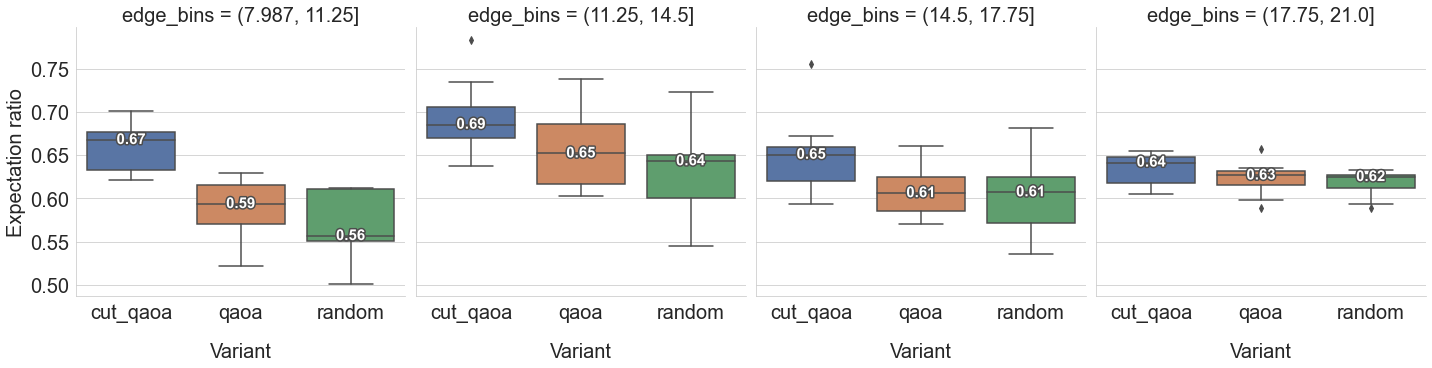

In [6]:
exp_df_f['edge_bins'] = pd.cut(exp_df_f['number_of_edges'], 4)
exp_df_f['edge_bins'] = exp_df_f['edge_bins'].apply(lambda b: str(b))
bp_exp = boxplot_df(exp_df_f, x='algorithm', y='value', col='edge_bins', order=['cut_qaoa', 'qaoa', 'random'],
                    ylabel='Expectation ratio', xlabel='Variant', median_fontsize=15, context=context_boxplots)

In [8]:
exp_df

,algorithm,value_type,value,exp_id,graph_size,backend,number_of_edges
0,qaoa_short,expectation,-7.485830,61,10,ibmq_ehningen,14
1,qaoa_short,expectation_norm,0.680530,61,10,ibmq_ehningen,14
2,cut_qaoa,expectation,-7.489162,61,10,ibmq_ehningen,14
3,cut_qaoa,expectation_norm,0.680833,61,10,ibmq_ehningen,14
4,qaoa,expectation,-7.169060,61,10,ibmq_ehningen,14
...,...,...,...,...,...,...,...
407,cut_qaoa,expectation_norm,0.706456,25,10,ibmq_kolkata,12
408,qaoa,expectation,-6.191710,25,10,ibmq_kolkata,12
409,qaoa,expectation_norm,0.619171,25,10,ibmq_kolkata,12
410,random,expectation,-6.004190,25,10,ibmq_kolkata,12


In [9]:
appr_df = get_appr_ratio_df(path, min_exp=13, max_exp=None, config=None, include_random=False)

61
59
66
50
68
57
32
35
69
56
51
58
67
60
34
33
20
18
27
29
45
28
19
26
21
38
36
31
65
62
54
53
30
37
39
52
55
63
64
46
70
24
23
15
71
49
40
47
13
14
22
25
61
59
66
50
68
57
32
35
69
56
51
58
67
60
34
33
20
18
27
29
45
28
19
26
21
38
36
31
65
62
54
53
30
37
39
52
55
63
64
46
70
24
23
15
71
49
40
47
13
14
22
25
Created Df


In [10]:
appr_df

,algorithm,appr_ratio,obj_diff,expect_ratio,initial_params,n_evals,exp_id,graph_size,backend,number_of_edges
0,qaoa,0.727273,3,0.673864,"[1.5517685413423905, 4.907348921355189]",31,61,10,ibmq_ehningen,14
1,qaoa,0.636364,4,0.672345,"[2.141937457376256, 2.1927225498996585]",31,61,10,ibmq_ehningen,14
2,qaoa,0.909091,1,0.647836,"[2.1141936607453884, 1.0084206931734017]",28,61,10,ibmq_ehningen,14
3,qaoa,0.454545,6,0.650164,"[0.06792863559063178, 1.9644089120361106]",29,61,10,ibmq_ehningen,14
4,qaoa,0.363636,7,0.637455,"[2.9608120887921756, 6.189361948466918]",25,61,10,ibmq_ehningen,14
...,...,...,...,...,...,...,...,...,...,...
1509,cut_qaoa,1.000000,0,0.683532,"[1.1366923726230163, 1.781744343969177]",32,25,10,ibmq_kolkata,12
1510,cut_qaoa,1.000000,0,0.691962,"[0.748660110605417, 3.916247758824963]",33,25,10,ibmq_kolkata,12
1511,cut_qaoa,1.000000,0,0.729960,"[3.0232631240282024, 2.3595545055857627]",35,25,10,ibmq_kolkata,12
1512,cut_qaoa,0.800000,2,0.733588,"[0.10479160244406818, 1.3043993190941856]",31,25,10,ibmq_kolkata,12


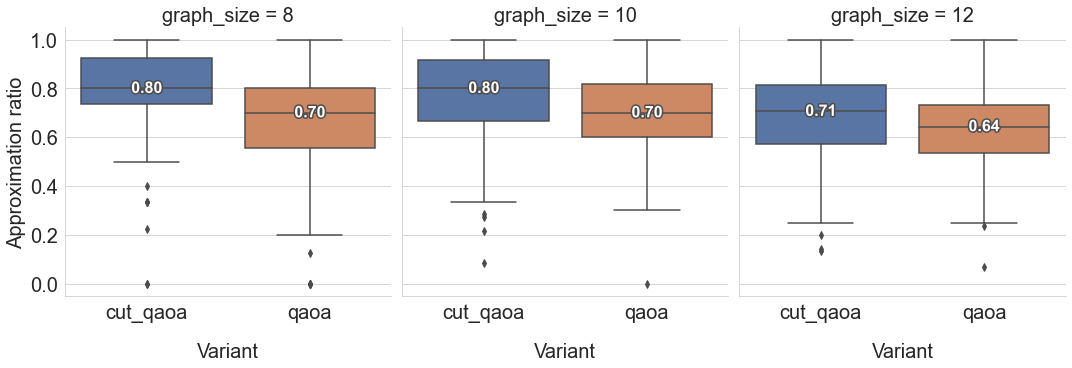

In [11]:
appr_df_f = appr_df[appr_df['graph_size'] != 14].copy()
appr_df_f = appr_df_f[appr_df_f['algorithm'] != 'qaoa'].copy()
appr_df_f = appr_df_f[appr_df_f['algorithm'] != 'random'].copy()
appr_df_f = appr_df_f[~appr_df_f['exp_id'].isin(exclude_ids)]
appr_df_f['algorithm'] = appr_df_f['algorithm'].apply(lambda name: name.replace('qaoa_short', 'qaoa'))
bp_appr = boxplot_df(appr_df_f, x='algorithm', y='appr_ratio', col='graph_size', order=['cut_qaoa', 'qaoa'],
                     ylabel='Approximation ratio', xlabel='Variant', median_fontsize=16, context=context_boxplots)

bp_appr.savefig((figure_path / 'appr_ratio_boxplot.pdf').resolve())
bp_appr.savefig((figure_path / 'figure_9.eps').resolve())

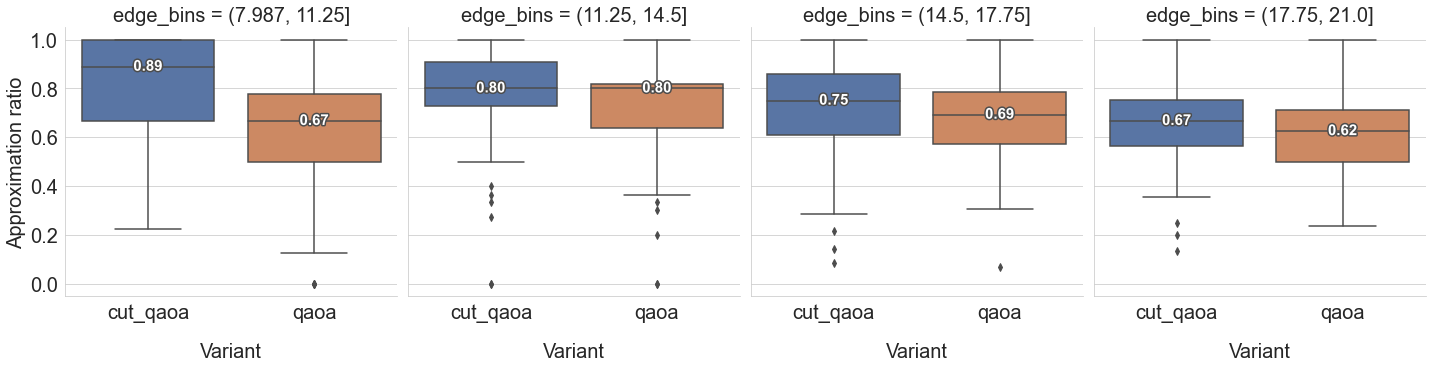

In [12]:
appr_df_f['edge_bins'] = pd.cut(appr_df_f['number_of_edges'], 4)
appr_df_f['edge_bins'] = appr_df_f['edge_bins'].apply(lambda b: str(b))
bp_appr = boxplot_df(appr_df_f, x='algorithm', y='appr_ratio', col='edge_bins', order=['cut_qaoa', 'qaoa'],
                     ylabel='Approximation ratio', xlabel='Variant', median_fontsize=15, context=context_boxplots)

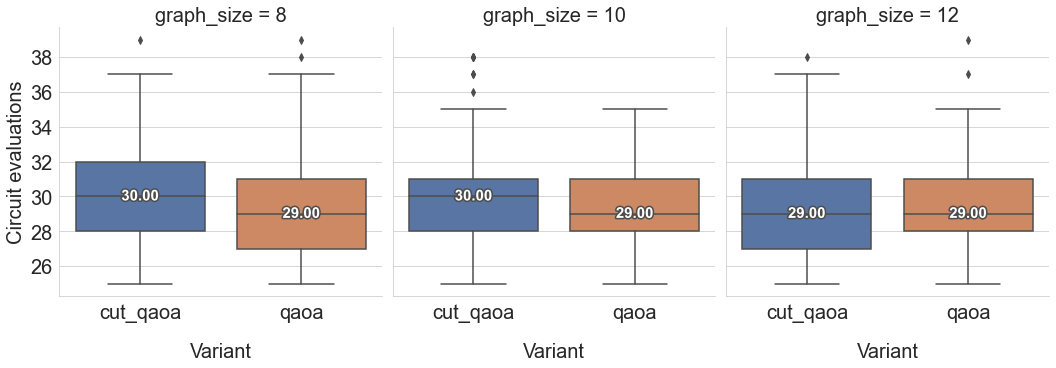

In [13]:
bp_n_evals = boxplot_df(appr_df_f, x='algorithm', y='n_evals', col='graph_size', order=['cut_qaoa', 'qaoa'],
                        ylabel='Circuit evaluations', xlabel='Variant', median_fontsize=15, context=context_boxplots)

In [14]:
metric_df = get_all_metrics_df(path)
metric_df.groupby(['exp_id']).count()

,algorithm,shots,graph_size,backend,number_of_edges,metric,value
exp_id,,,,,,,
0,1560,1560,1560,1560,1560,1560,1320
1,1560,1560,1560,1560,1560,1560,1320
10,1560,1560,1560,1560,1560,1560,1320
12,1560,1560,1560,1560,1560,1560,1320
13,1560,1560,1560,1560,1560,1560,1560
...,...,...,...,...,...,...,...
69,1560,1560,1560,1560,1560,1560,1560
70,1560,1560,1560,1560,1560,1560,1560
71,1560,1560,1560,1560,1560,1560,1558


/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


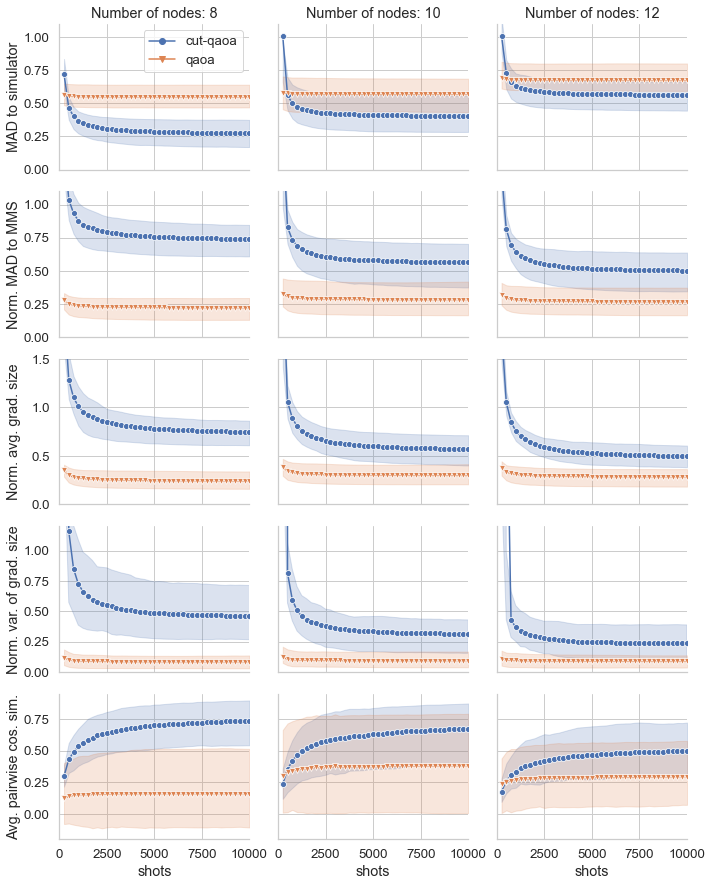

In [15]:
metric_df_f = metric_df[metric_df['graph_size'] != 14].copy()
metric_df_f = metric_df_f[metric_df_f['algorithm'] != 'qaoa'].copy()
metric_df_f['algorithm'] = metric_df_f['algorithm'].apply(lambda name: name.replace('qaoa-short', 'qaoa'))
ylims = {
    'mean_absolute_error': (0.0, 1.1),
    'mean_absolute_error_norm': (0.0, 0.175),
    'max_mixed_diff': (0, 1.1),
    'max_mixed_diff_norm_sim': (0, 1.1),
    'gradient_length_avg': (0, 5),
    'gradient_length_avg_norm_sim': (0, 1.5),
    'gradient_length_var': (0, 5),
    'gradient_length_var_norm_sim': (0, 1.2),
    'avg_similarity': (-0.2, 0.95)
}
xlim = (0, 10000)
ylabels = {
    'mean_absolute_error': 'MAD to simulator',
    'mean_absolute_error_norm': 'Norm. MAD to simulator',
    'max_mixed_diff': 'MAD to MMS',
    'max_mixed_diff_norm_sim': 'Norm. MAD to MMS',
    'gradient_length_avg': 'Average gradient size',
    'gradient_length_avg_norm_sim': 'Norm. avg. grad. size',
    'gradient_length_var': 'Variance of gradient size',
    'gradient_length_var_norm_sim': 'Norm. var. of grad. size',
    'avg_similarity': 'Avg. pairwise cos. sim.'
}
row_order = ['mean_absolute_error', 'max_mixed_diff_norm_sim', 'gradient_length_avg_norm_sim',
             'gradient_length_var_norm_sim', 'avg_similarity']
# row_order = None

grid = grid_plot_df(metric_df_f, hue_order=['cut-qaoa', 'qaoa'], ylims=ylims, ylabels=ylabels, xlim=xlim,
                    row_order=row_order, height=3, style='algorithm', markers=markers, dashes=False, font_size=20,
                    aspect=1.25, facet_kws={'sharey': 'row', 'margin_titles': True, 'legend_out': False,
                                            'gridspec_kws': {'wspace': 0.15, 'hspace': 0.15}})
grid.axes[0, 0].legend()
# grid.tight_layout()
grid.savefig((figure_path / 'all.pdf').resolve())
grid.savefig((figure_path / 'figure_7.pdf').resolve(), rasterized=True)

In [19]:
mean_metric_df = metric_df_f[metric_df_f['shots'] == 10000]
qaoa_mean_metric_df = mean_metric_df[mean_metric_df['algorithm'] == 'qaoa']
print(len(qaoa_mean_metric_df))
cut_mean_metric_df = mean_metric_df[mean_metric_df['algorithm'] == 'cut-qaoa']
print(len(cut_mean_metric_df))
qaoa_mean_metric_df = qaoa_mean_metric_df.groupby(['metric']).mean()
cut_mean_metric_df = cut_mean_metric_df.groupby(['metric']).mean()
mean_metric_df

793
793


,exp_id,algorithm,shots,graph_size,backend,number_of_edges,metric,value
118,61,cut-qaoa,10000,10,ibmq_ehningen,14,mean_absolute_error,0.399810
119,61,qaoa,10000,10,ibmq_ehningen,14,mean_absolute_error,0.523407
238,59,cut-qaoa,10000,8,ibmq_ehningen,11,mean_absolute_error,0.210936
239,59,qaoa,10000,8,ibmq_ehningen,11,mean_absolute_error,0.479766
358,66,cut-qaoa,10000,8,ibmq_ehningen,12,mean_absolute_error,0.184463
...,...,...,...,...,...,...,...,...
22439,14,qaoa,10000,10,ibmq_kolkata,11,weighted_similarity,0.600667
22558,22,cut-qaoa,10000,12,ibmq_guadalupe,16,weighted_similarity,0.778850
22559,22,qaoa,10000,12,ibmq_guadalupe,16,weighted_similarity,0.662672
22678,25,cut-qaoa,10000,10,ibmq_kolkata,12,weighted_similarity,0.957558


In [20]:
qaoa_mean_metric_df

,shots,graph_size,number_of_edges,value
metric,,,,
avg_similarity,10000.0,10.0,14.0,0.290332
gradient_length_avg,10000.0,10.0,14.0,1.116269
gradient_length_avg_norm_sim,10000.0,10.0,14.0,0.276838
gradient_length_var,10000.0,10.0,14.0,0.764178
gradient_length_var_norm_sim,10000.0,10.0,14.0,0.087893
max_mixed_diff,10000.0,10.0,14.0,0.163423
max_mixed_diff_norm_sim,10000.0,10.0,14.0,0.258794
mean_absolute_error,10000.0,10.0,14.0,0.592797
mean_absolute_error_norm,10000.0,10.0,14.0,0.110571


In [21]:
cut_mean_metric_df

,shots,graph_size,number_of_edges,value
metric,,,,
avg_similarity,10000.0,10.0,14.0,0.640307
gradient_length_avg,10000.0,10.0,14.0,2.381177
gradient_length_avg_norm_sim,10000.0,10.0,14.0,0.600710
gradient_length_var,10000.0,10.0,14.0,2.781139
gradient_length_var_norm_sim,10000.0,10.0,14.0,0.333173
max_mixed_diff,10000.0,10.0,14.0,0.370310
max_mixed_diff_norm_sim,10000.0,10.0,14.0,0.597249
mean_absolute_error,10000.0,10.0,14.0,0.412828
mean_absolute_error_norm,10000.0,10.0,14.0,0.073116


In [22]:
cut_mean_metric_df.div(qaoa_mean_metric_df)

,shots,graph_size,number_of_edges,value
metric,,,,
avg_similarity,1.0,1.0,1.0,2.205434
gradient_length_avg,1.0,1.0,1.0,2.133158
gradient_length_avg_norm_sim,1.0,1.0,1.0,2.169898
gradient_length_var,1.0,1.0,1.0,3.639386
gradient_length_var_norm_sim,1.0,1.0,1.0,3.790657
max_mixed_diff,1.0,1.0,1.0,2.265966
max_mixed_diff_norm_sim,1.0,1.0,1.0,2.307820
mean_absolute_error,1.0,1.0,1.0,0.696408
mean_absolute_error_norm,1.0,1.0,1.0,0.661259


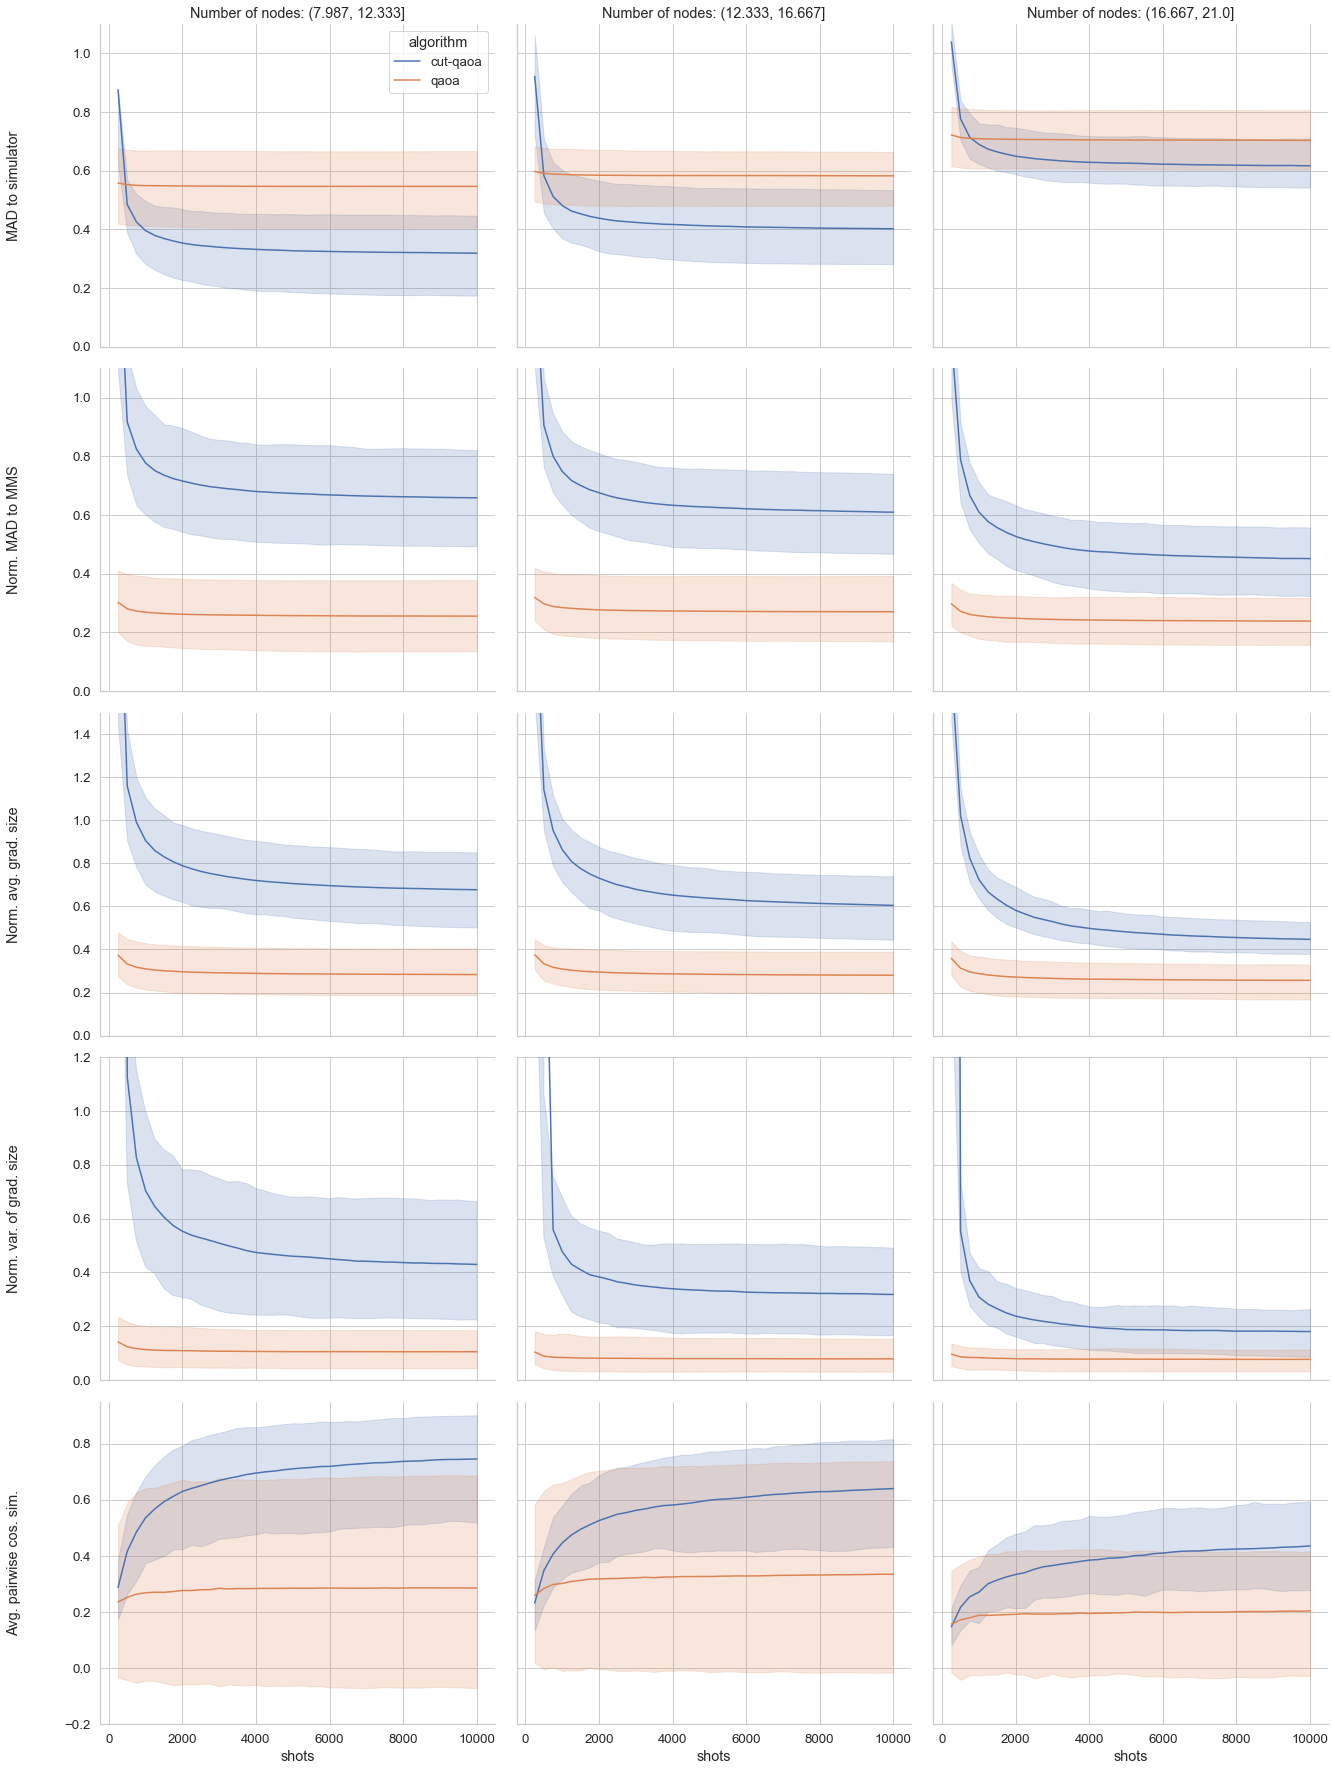

In [15]:
metric_df_f['edge_bins'] = pd.cut(metric_df_f['number_of_edges'], 3)
metric_df_f['edge_bins'] = metric_df_f['edge_bins'].apply(lambda b: str(b))
grid = grid_plot_df(metric_df_f, hue_order=['cut-qaoa', 'qaoa'], ylims=ylims, ylabels=ylabels, row_order=row_order,
                    col='edge_bins')

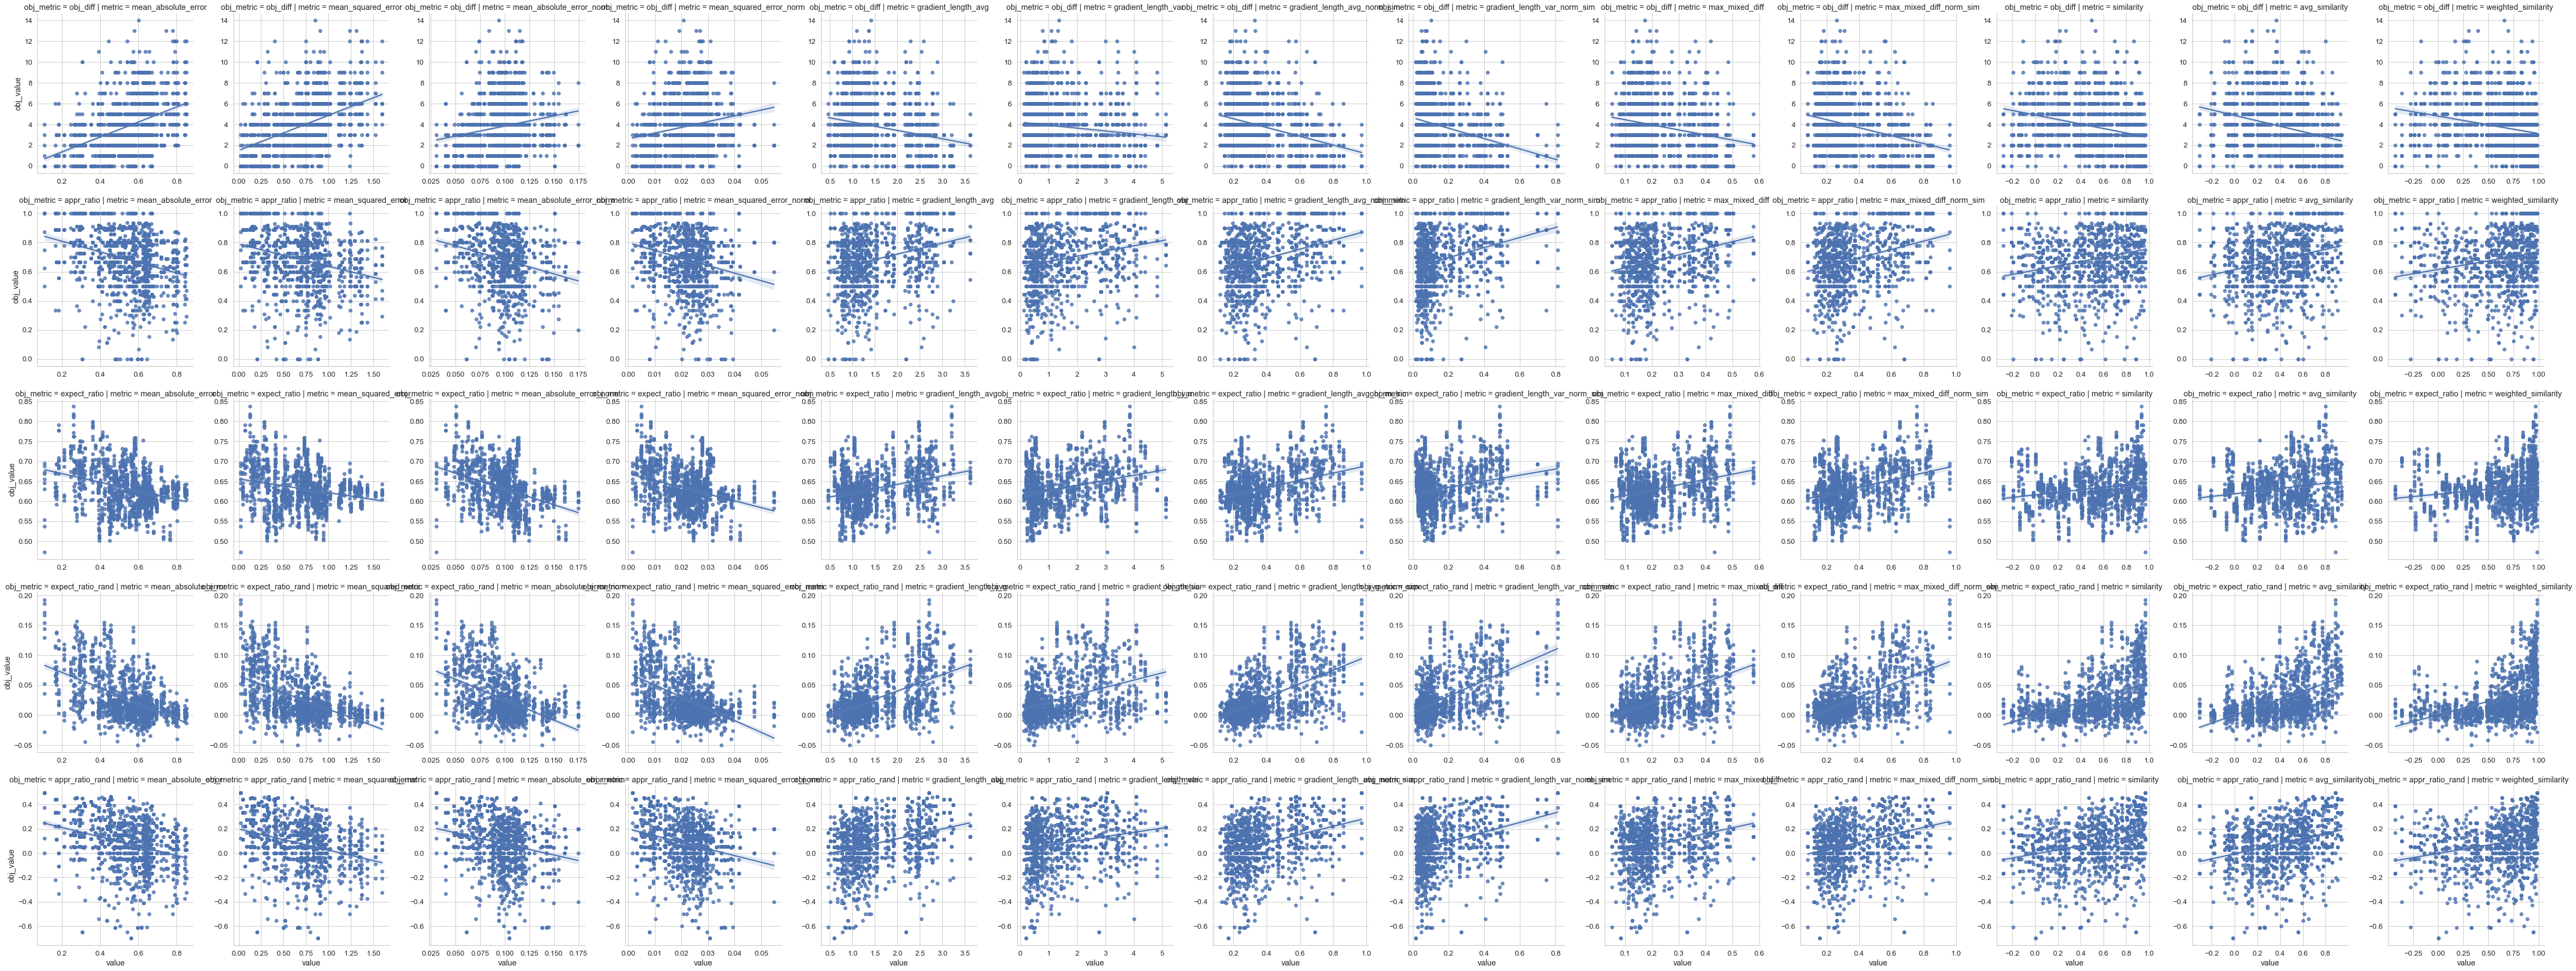

In [58]:
exp_df_random = exp_df[(exp_df['algorithm'] == 'random') & (exp_df['value_type'] == 'expectation_norm')]
appr_with_random = appr_df.merge(exp_df_random[['exp_id', 'value']], on=['exp_id'])
appr_with_random['expect_ratio_rand'] = appr_with_random['expect_ratio'] - appr_with_random['value']
appr_with_random['appr_ratio_rand'] = appr_with_random['appr_ratio'] - appr_with_random['value']
appr_with_random = appr_with_random.rename(columns={"value": "random"})
df = correlation(path, min_exp=13, max_exp=None, config=None, add_config=True,
                 df_y=appr_with_random.drop(columns=['number_of_edges']))

/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


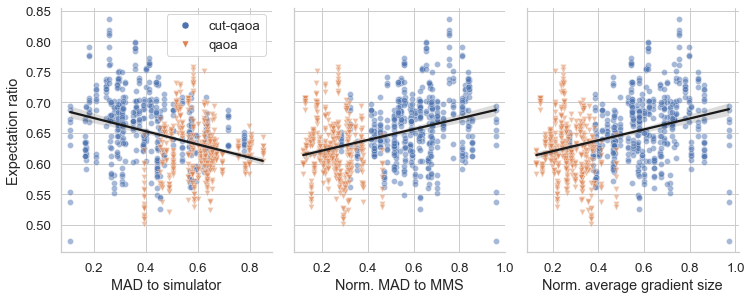

In [60]:
columns = ['mean_absolute_error', 'max_mixed_diff_norm_sim', 'gradient_length_avg_norm_sim']
df_filter = df[
    (df['metric'].isin(columns)) &
    (df['algorithm'] != 'qaoa') &
    (df['obj_metric'] == 'expect_ratio') &
    (~df['exp_id'].isin(exclude_ids))].copy()

df_filter['algorithm'] = df_filter['algorithm'].apply(lambda name: name.replace('qaoa-short', 'qaoa'))

cor_grid = plot_scatter_with_regression2(df_filter, x='value', y='obj_value', col='metric', hue='algorithm',
                                         col_order=columns, markers=['o', 'v'], sharey=True, height=4.5, aspect=0.9,
                                         alpha=0.5)
cor_grid.savefig((figure_path / 'correlation.pdf').resolve())

/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/m/repos/own/qc-split/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


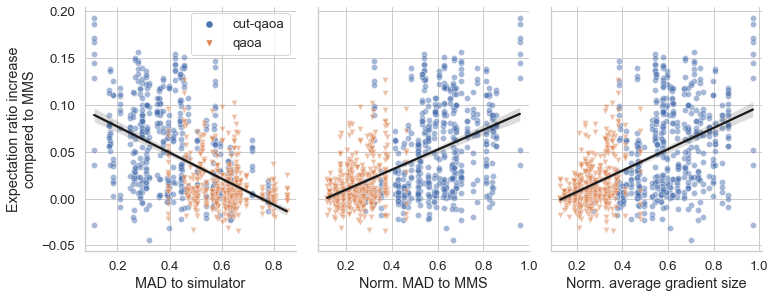

In [61]:
columns = ['mean_absolute_error', 'max_mixed_diff_norm_sim', 'gradient_length_avg_norm_sim']
df_filter = df[
    (df['metric'].isin(columns)) &
    (df['algorithm'] != 'qaoa') &
    (df['obj_metric'] == 'expect_ratio_rand') &
    (~df['exp_id'].isin(exclude_ids))].copy()

df_filter['algorithm'] = df_filter['algorithm'].apply(lambda name: name.replace('qaoa-short', 'qaoa'))

cor_grid = plot_scatter_with_regression2(df_filter, x='value', y='obj_value', col='metric', hue='algorithm',
                                         col_order=columns, markers=['o', 'v'], sharey=True, height=4.5, aspect=0.9,
                                         alpha=0.5, ylabel='Expectation ratio increase\ncompared to MMS')
cor_grid.savefig((figure_path / 'correlation_rand.pdf').resolve())
cor_grid.savefig((figure_path / 'figure_10.pdf').resolve(), rasterized=True)

In [62]:
example_df = metric_df[metric_df['exp_id'] == str(example_id)].copy()
example_df = example_df[example_df['algorithm'] != 'qaoa'].copy()
example_df['algorithm'] = example_df['algorithm'].apply(lambda name: name.replace('qaoa-short', 'qaoa'))
example_df

,exp_id,algorithm,shots,graph_size,backend,number_of_edges,metric,value
1921,20,cut-qaoa,250,10,ibmq_ehningen,15,mean_absolute_error,0.743422
1922,20,qaoa,250,10,ibmq_ehningen,15,mean_absolute_error,0.638358
1924,20,cut-qaoa,500,10,ibmq_ehningen,15,mean_absolute_error,0.541014
1925,20,qaoa,500,10,ibmq_ehningen,15,mean_absolute_error,0.629174
1927,20,cut-qaoa,750,10,ibmq_ehningen,15,mean_absolute_error,0.475946
...,...,...,...,...,...,...,...,...
17313,20,qaoa,9500,10,ibmq_ehningen,15,weighted_similarity,0.578161
17315,20,cut-qaoa,9750,10,ibmq_ehningen,15,weighted_similarity,0.946608
17316,20,qaoa,9750,10,ibmq_ehningen,15,weighted_similarity,0.577683
17318,20,cut-qaoa,10000,10,ibmq_ehningen,15,weighted_similarity,0.946530


In [63]:
hue_order = ['cut-qaoa', 'qaoa']

In [64]:
def metric_plot(df, metric, ylabel, hue_order=None, figsize=(5, 4)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    sns.lineplot(ax=ax, data=df[df['metric'] == metric], x='shots', y='value', hue='algorithm', style='algorithm',
                 hue_order=hue_order, markers=markers, dashes=False)
    ax.set_ylabel(ylabel)
    return fig, ax


def add_sim_line(ax, path, metric):
    sim_val = pd.read_csv(path).query('algorithm =="simulator"').iloc[0][metric]
    ax.axhline(y=sim_val, color='green', linestyle='--', label='simulator')
    ax.legend()
    return ax

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


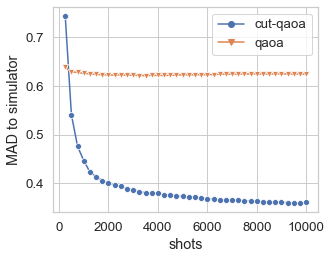

In [65]:
metric = 'mean_absolute_error'
fig, ax = metric_plot(example_df, metric, ylabels[metric], hue_order)
ax.legend()
fig.tight_layout()
fig.savefig((figure_path / 'exp1_errors_me.pdf').resolve())
fig.savefig((figure_path / 'figure_6a.eps').resolve())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


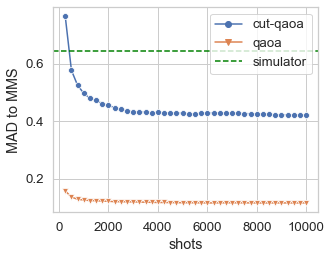

In [66]:
metric = 'max_mixed_diff'
fig, ax = metric_plot(example_df, metric, ylabels[metric], hue_order)
ax = add_sim_line(ax, example_path / 'max_mixed_diff.csv', metric)
fig.tight_layout()
fig.savefig((figure_path / 'exp1_max_mixed_diff.pdf').resolve())
fig.savefig((figure_path / 'figure_6b.eps').resolve())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


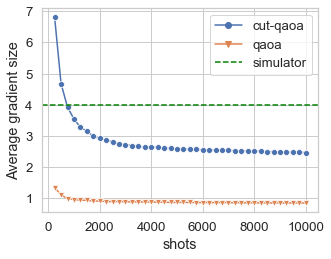

In [67]:
metric = 'gradient_length_avg'
fig, ax = metric_plot(example_df, metric, ylabels[metric], hue_order)
ax = add_sim_line(ax, example_path / 'gradient_length.csv', metric)
fig.tight_layout()
fig.savefig((figure_path / 'exp1_gradient_length_avg.pdf').resolve())
fig.savefig((figure_path / 'figure_6c.eps').resolve())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


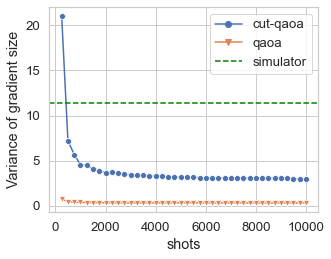

In [68]:
metric = 'gradient_length_var'
fig, ax = metric_plot(example_df, metric, ylabels[metric], hue_order)
ax = add_sim_line(ax, example_path / 'gradient_length.csv', metric)
fig.tight_layout()
fig.savefig((figure_path / 'exp1_gradient_length_var.pdf').resolve())
fig.savefig((figure_path / 'figure_6d.eps').resolve())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


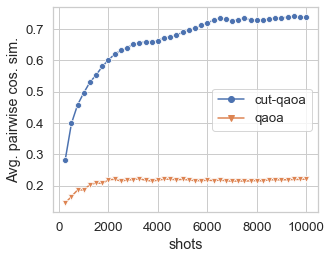

In [69]:
metric = 'avg_similarity'
fig, ax = metric_plot(example_df, metric, ylabels[metric], hue_order)
ax.legend()
fig.tight_layout()
fig.savefig((figure_path / 'exp1_similarity_avg.pdf').resolve())
fig.savefig((figure_path / 'figure_6e.eps').resolve())

In [70]:
exp_df_random = exp_df[(exp_df['algorithm'] == 'random') & (exp_df['value_type'] == 'expectation_norm')]
exp_df_random

,algorithm,value_type,value,exp_id,graph_size,backend,number_of_edges
7,random,expectation_norm,0.636225,61,10,ibmq_ehningen,14
15,random,expectation_norm,0.611481,59,8,ibmq_ehningen,11
23,random,expectation_norm,0.665901,66,8,ibmq_ehningen,12
31,random,expectation_norm,0.649951,50,8,ibmq_ehningen,13
39,random,expectation_norm,0.624677,68,10,ibmq_ehningen,15
47,random,expectation_norm,0.612091,57,8,ibmq_ehningen,11
55,random,expectation_norm,0.624925,32,10,ibmq_guadalupe,15
63,random,expectation_norm,0.633303,35,12,ibmq_kolkata,19
71,random,expectation_norm,0.650257,69,8,ibmq_ehningen,13
79,random,expectation_norm,0.649735,56,8,ibmq_ehningen,13


In [71]:
appr_with_random = appr_df.merge(exp_df_random[['exp_id', 'value']], on=['exp_id'])
appr_with_random['expect_ratio_rand'] = appr_with_random['expect_ratio'] - appr_with_random['value']
appr_with_random['appr_ratio_rand'] = appr_with_random['appr_ratio'] - appr_with_random['value']
appr_with_random

,algorithm,appr_ratio,obj_diff,expect_ratio,initial_params,n_evals,exp_id,graph_size,backend,number_of_edges,value,expect_ratio_rand,appr_ratio_rand
0,qaoa,0.727273,3,0.673864,"[1.5517685413423905, 4.907348921355189]",31,61,10,ibmq_ehningen,14,0.636225,0.037638,0.091047
1,qaoa,0.636364,4,0.672345,"[2.141937457376256, 2.1927225498996585]",31,61,10,ibmq_ehningen,14,0.636225,0.036120,0.000138
2,qaoa,0.909091,1,0.647836,"[2.1141936607453884, 1.0084206931734017]",28,61,10,ibmq_ehningen,14,0.636225,0.011611,0.272865
3,qaoa,0.454545,6,0.650164,"[0.06792863559063178, 1.9644089120361106]",29,61,10,ibmq_ehningen,14,0.636225,0.013938,-0.181680
4,qaoa,0.363636,7,0.637455,"[2.9608120887921756, 6.189361948466918]",25,61,10,ibmq_ehningen,14,0.636225,0.001229,-0.272589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,cut_qaoa,1.000000,0,0.683532,"[1.1366923726230163, 1.781744343969177]",32,25,10,ibmq_kolkata,12,0.600419,0.083113,0.399581
1510,cut_qaoa,1.000000,0,0.691962,"[0.748660110605417, 3.916247758824963]",33,25,10,ibmq_kolkata,12,0.600419,0.091543,0.399581
1511,cut_qaoa,1.000000,0,0.729960,"[3.0232631240282024, 2.3595545055857627]",35,25,10,ibmq_kolkata,12,0.600419,0.129541,0.399581
1512,cut_qaoa,0.800000,2,0.733588,"[0.10479160244406818, 1.3043993190941856]",31,25,10,ibmq_kolkata,12,0.600419,0.133169,0.199581


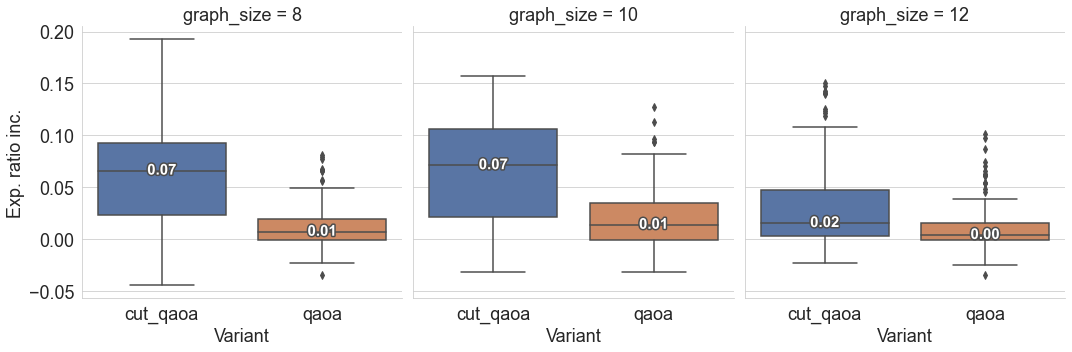

In [72]:
appr_with_random_f = appr_with_random[appr_with_random['graph_size'] != 14].copy()
appr_with_random_f = appr_with_random_f[appr_with_random_f['algorithm'] != 'qaoa'].copy()
appr_with_random_f = appr_with_random_f[appr_with_random_f['algorithm'] != 'random'].copy()
appr_with_random_f = appr_with_random_f[~appr_with_random_f['exp_id'].isin(exclude_ids)]
appr_with_random_f['algorithm'] = appr_with_random_f['algorithm'].apply(lambda name: name.replace('qaoa_short', 'qaoa'))
bp_expect_rand = boxplot_df(appr_with_random_f, x='algorithm', y='expect_ratio_rand', col='graph_size',
                            order=['cut_qaoa', 'qaoa'], ylabel='Exp. ratio inc.', xlabel='Variant', median_fontsize=15,
                            context=context_boxplots)

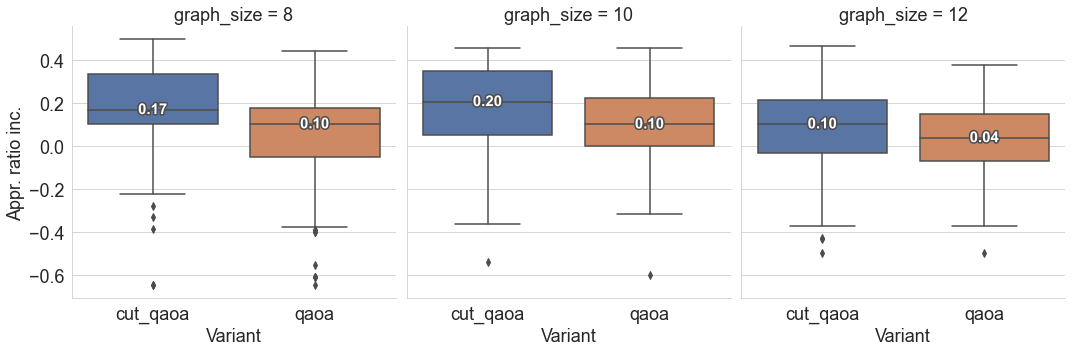

In [73]:
bp_appr_rand = boxplot_df(appr_with_random_f, x='algorithm', y='appr_ratio_rand', col='graph_size',
                          order=['cut_qaoa', 'qaoa'], ylabel='Appr. ratio inc.', xlabel='Variant', median_fontsize=15,
                          context=context_boxplots)

In [74]:
import numpy as np
from eval_util import average


def contur_plots(csv_path, cols):
    df = pd.read_csv(csv_path)
    average(df, cols)
    cols_avg = [f'{c}_avg' for c in cols]
    row_numbers = df.shape[0]
    shape = (int(np.sqrt(row_numbers / 2)), 2 * int(np.sqrt(row_numbers / 2)))

In [75]:
from ast import literal_eval

cols = ['qaoa-short_1000', 'cut-qaoa_1000', 'qaoa-short_10000', 'cut-qaoa_10000']

df_param_maps = pd.read_csv('../experiment_complete/20/ibmq_ehningen_2022-08-24-05-50-51/param_map/parameter_map.csv',
                            index_col=0)
df_param_maps['parameters'] = df_param_maps['parameters'].apply(lambda x: literal_eval(x))
df_param_maps['beta'] = df_param_maps['parameters'].apply(lambda p: p[0])
df_param_maps['gamma'] = df_param_maps['parameters'].apply(lambda p: p[1])
average(df_param_maps, cols)
cols_and_params = [f'{c}_avg' for c in cols]
value_vars = cols_and_params
cols_and_params.extend(['beta', 'gamma'])
df_params_reduced = df_param_maps[cols_and_params].copy()
df_params_reduced

,qaoa-short_1000_avg,cut-qaoa_1000_avg,qaoa-short_10000_avg,cut-qaoa_10000_avg,beta,gamma
0,-7.259,-7.750260,-7.2495,-7.480194,0.000000,0.000000
1,-7.159,-7.423009,-7.2446,-7.359943,0.000000,0.161107
2,-7.210,-7.431984,-7.2916,-7.301462,0.000000,0.322215
3,-7.312,-7.366337,-7.2462,-7.112630,0.000000,0.483322
4,-7.268,-7.377968,-7.3253,-7.084090,0.000000,0.644429
...,...,...,...,...,...,...
795,-7.205,-8.022514,-7.2233,-7.517703,3.141593,5.638756
796,-7.497,-7.602642,-7.4268,-7.593966,3.141593,5.799863
797,-7.335,-7.092634,-7.3561,-7.550902,3.141593,5.960971
798,-7.258,-7.260133,-7.2050,-7.432055,3.141593,6.122078


In [76]:
df_params_reduced = df_params_reduced.melt(id_vars=['beta', 'gamma'], value_vars=value_vars)
df_params_reduced['algorithm'] = df_params_reduced['variable'].apply(lambda s: s.split('_')[0])
df_params_reduced['algorithm'] = df_params_reduced['algorithm'].apply(
    lambda s: "cut-QAOA" if s == "cut-qaoa" else "QAOA")
df_params_reduced['shots'] = df_params_reduced['variable'].apply(lambda s: int(s.split('_')[1]))

In [77]:
df_params_reduced

,beta,gamma,variable,value,algorithm,shots
0,0.000000,0.000000,qaoa-short_1000_avg,-7.259000,QAOA,1000
1,0.000000,0.161107,qaoa-short_1000_avg,-7.159000,QAOA,1000
2,0.000000,0.322215,qaoa-short_1000_avg,-7.210000,QAOA,1000
3,0.000000,0.483322,qaoa-short_1000_avg,-7.312000,QAOA,1000
4,0.000000,0.644429,qaoa-short_1000_avg,-7.268000,QAOA,1000
...,...,...,...,...,...,...
3195,3.141593,5.638756,cut-qaoa_10000_avg,-7.517703,cut-QAOA,10000
3196,3.141593,5.799863,cut-qaoa_10000_avg,-7.593966,cut-QAOA,10000
3197,3.141593,5.960971,cut-qaoa_10000_avg,-7.550902,cut-QAOA,10000
3198,3.141593,6.122078,cut-qaoa_10000_avg,-7.432055,cut-QAOA,10000


/var/folders/hq/v8b6jv254mq8sgrghf3p2crm0000gn/T/ipykernel_94034/826955476.py:15: UserWarning: The following kwargs were not used by contour: 'color'
  cb = plt.contourf(*args, **kwargs)
/var/folders/hq/v8b6jv254mq8sgrghf3p2crm0000gn/T/ipykernel_94034/826955476.py:15: UserWarning: The following kwargs were not used by contour: 'color'
  cb = plt.contourf(*args, **kwargs)
/var/folders/hq/v8b6jv254mq8sgrghf3p2crm0000gn/T/ipykernel_94034/826955476.py:15: UserWarning: The following kwargs were not used by contour: 'color'
  cb = plt.contourf(*args, **kwargs)
/var/folders/hq/v8b6jv254mq8sgrghf3p2crm0000gn/T/ipykernel_94034/826955476.py:15: UserWarning: The following kwargs were not used by contour: 'color'
  cb = plt.contourf(*args, **kwargs)


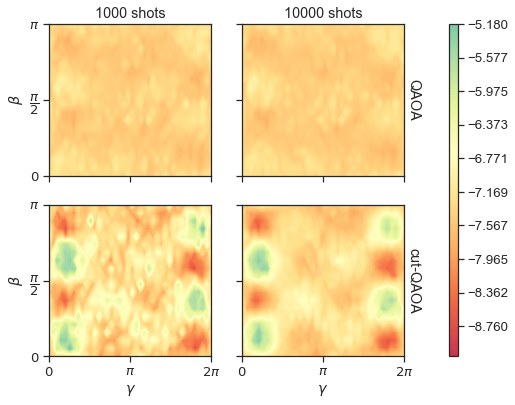

In [78]:
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from eval_param_maps import get_v_min_max
from matplotlib.cm import ScalarMappable, Spectral

cmap = Spectral
levels = 100


def plot_func(*args, **kwargs):
    row_numbers = args[0].shape[0]
    shape = (int(np.sqrt(row_numbers / 2)), 2 * int(np.sqrt(row_numbers / 2)))
    grid = np.array(args[0].to_list()).reshape(shape)
    args = list(args)
    args[0] = grid
    cb = plt.contourf(*args, **kwargs)
    for c in cb.collections:
        c.set_edgecolor("face")
    return cb


def truncate_colormap(cmap, minval_qpu, maxval_qpu, minval_sim, maxval_sim, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    range_sim = maxval_sim - minval_sim
    minval = (minval_qpu - minval_sim) / range_sim
    maxval = (maxval_qpu - minval_sim) / range_sim
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


# sns.displot(data=df_params_reduced, kind='kde', x='gamma', y='beta', col='shots', row='algorithm', weights='value', fill=True,  thresh=0, levels=100, cmap='Spectral')
v_min, v_max = get_v_min_max('../experiment_complete/20/aer_simulator_1661354446556649204/parameter_map.csv', 'qaoa')
min_qpu, max_qpu = df_params_reduced['value'].min(), df_params_reduced['value'].max()
with sns.axes_style("ticks"):
    g = sns.FacetGrid(data=df_params_reduced, col='shots', row='algorithm', margin_titles=True, despine=False)
    g.map(plot_func, 'value', cmap=cmap, levels=levels, vmin=v_min, vmax=v_max, extent=(0, 2 * np.pi, 0, np.pi))
    g.set_xlabels(r'$\gamma$')
    g.set_ylabels(r'$\beta$')
    g.set(xticks=np.arange(0, 2 * np.pi + 0.01, np.pi), xticklabels=['$0$', r'$\pi$', r'$2\pi$'])
    g.set(yticks=np.arange(0, np.pi + 0.01, np.pi / 2), yticklabels=['$0$', r'$\dfrac{\pi}{2}$', r'$\pi$'])
    min_y = np.infty
    max_y = -np.infty
    for name, ax in g.axes_dict.items():
        for i in range(2):
            min_y = min(min_y, ax.get_position().get_points()[i, 1])
            max_y = max(max_y, ax.get_position().get_points()[i, 1])
    cbar_ax = g.fig.add_axes([1.015, min_y, 0.02, max_y - min_y])
    t_cmap = truncate_colormap(cmap, min_qpu, max_qpu, v_min, v_max)
    norm = BoundaryNorm(np.linspace(min_qpu, max_qpu, levels), t_cmap.N)
    cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=t_cmap), cax=cbar_ax)
    cbar.solids.set_edgecolor("face")
    g.set_titles(row_template='{row_name}', col_template='{col_name} shots')
g.savefig(figure_path / 'param_maps.pdf')
g.savefig(figure_path / 'figure_5.eps')